# UE10 - Extraction

- Khang Duy LAI
- Mazen TEBIB

## Import important libraries

In [1]:
import numpy as np
import pandas as pd
import re
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

1) cleaning text
2) choosing model
3) features extraction
4) confusion matrix for grps 
5) run model through groups (cascade thingy)

In [3]:
# metrics to check : 
# 1)taux d'erreur
# 2)Precision **** to maximise
# 3)Rappel **** also to maximise ensemble
# 4)ROC : well we create one to maximise precision then one model to maximise rappelnd see which one perfoms better on both metrics(ROC)
# 5)moyenne harmonique de P et R (F-meùsure): 
# rapport : basically talk abt ur experiments, what did u want to try, el hypothese that we had to go after this,
#           how, analyze ur work and results u have 
#           (like saying ah we tried *this* ama we find out that our F1 score worse by this margin or better)
#           rendu : pdf rapport, zip for code

In [4]:
# we gotta change i'm to i am and can't to cannot and maybe we find can not we try to cahnge to cannot too 
#so we create a compteur that counts how many time we changed it from "smth"(not literally since we leave aka #smth in it's place f blaset'ha xd)  to cannot mais plutot on compte combien de cannot appeared that's r not #actually cannot 

In [5]:
# we gotta change i'm to i am and can't to cannot and maybe we find can not we try to cahnge to cannot too 
#so we create a compteur that counts how many time we changed it from "smth"(not literally since we leave aka 
# #smth in it's place f blaset'ha xd)  to cannot mais plutot on compte combien de cannot appeared that's r not 
# #actually cannot 

Read in the dataset

In [6]:
df = pd.read_fwf('./train.txt', colspecs=[(1,4),(6, None)], header=None)
df.columns = ['country','description']


In [7]:
df.head()

,country,description
0,GER,IThe importance and popularity of travelling i...
1,TUR,"It is an important decision , how to plan your..."
2,CHI,Some people believe that young people can enjo...
3,TEL,Travelling is usually considered as good recre...
4,ARA,i agree that . Life is a person live period of...


Encode the label

In [68]:
le = preprocessing.LabelEncoder()
df['y_country'] = le.fit_transform(df.country)

In [7]:
import nltk
nltk.download('cmudict')

[nltk_data] Downloading package cmudict to
[nltk_data]     /Users/laiduy98/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


True

In [8]:
from nltk.corpus import cmudict
from nltk.tokenize import word_tokenize, sent_tokenize
import string


def clean_review(text):
    """
    Clean the input text 
    """
    cleaned_text = text.lower()
    #cleaned_text =  re.sub(r'^https?:\/\/.*[\r\n]*', '', cleaned_text)
    cleaned_text = re.sub('<.*>', '', cleaned_text)
    cleaned_text = re.sub('[^a-zA-Z0-9\s]', '', cleaned_text)
    cleaned_text = cleaned_text.split()
    #cleaned_text = [word for word in cleaned_text if word not in stopwords and len(word) > 1]
    
    return " ".join(cleaned_text)

### - **Extracting lexical features**

In [11]:
#count number of sequences
def nb_seq(text):
    tokens = sent_tokenize(text)
    return (len(tokens))
df['nb_seq'] = df['description'].apply(lambda x: nb_seq(x))

In [12]:
#count number of words
def nb_words(text):
    text = word_tokenize(text)
    st = string.punctuation
    words = [word for word in text if word not in st]
    return len(words)
df['nb_words'] = df['description'].apply(lambda x: nb_words(x))

In [13]:
#extract text length
def len_text(text):
    len(text)
df['len_text'] = df['description'].apply(lambda x: len_text(x))

In [14]:
#count number of alphabetique characters
def nb_alpha(text):
    return sum(1 for i in text if i.isalpha())
df['nb_alpha'] = df['description'].apply(lambda x: nb_alpha(x))

In [15]:
#count of uppercase characters
def nb_upcase(text):
    return sum(1 for i in text if i.isupper())
df['nb_uppercase'] = df['description'].apply(lambda x: nb_upcase(x))

In [16]:
def syllable_count_Manual(word):
    word = word.lower()
    count = 0
    vowels = "aeiouy"
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
            if word.endswith("e"):
                count -= 1
    if count == 0:
        count += 1
    return count
def syllable_count(word):
    global cmuDictionary
    d = cmuDictionary
    try:
        syl = [len(list(y for y in x if y[-1].isdigit())) for x in d[word.lower()]][0]
    except:
        syl = syllable_count_Manual(word)
    return syl

In [17]:
#count syllables
global cmuDictionary
cmuDictionary = cmudict.dict()
df['nb_syllable'] = df['description'].apply(lambda x: syllable_count(x))

In [18]:
#count avg word length
from nltk.corpus import stopwords
def mean_word_length(word):
    punc = list(string.punctuation)
    tokens = word_tokenize(word, language='english')
    stop = stopwords.words('english') + punc 
    words = [word for word in tokens if word not in stop]
    return np.average([len(word) for word in words])
df['mean_word_length'] = df['description'].apply(lambda x: mean_word_length(x))

In [19]:
#Average Sentence Length By Character
def mean_sentence_length(text):
    tokens = sent_tokenize(text)
    return np.average([len(token) for token in tokens])
df['mean_sentence_length'] = df['description'].apply(lambda x: mean_sentence_length(x))

In [20]:
#Average sentence length by words
def mean_sentence_length_byWords(text):
    tokens = sent_tokenize(text)
    return np.average([len(token.split()) for token in tokens])
df['mean_sentence_length_byWords'] = df['description'].apply(lambda x: mean_sentence_length_byWords(x))

In [21]:
def tot_diff_words(text):
    words = word_tokenize(text)
    return len(set(words)) / len(words)
df['tot_diff_words'] = df['description'].apply(lambda x: tot_diff_words(x))

### - **Extracting Syntactic features**

In [22]:
#frequency of special character in a text
def freq_special_character(text):
    sc = string.punctuation
    count = 0
    for i in text:
        if (i in sc):
            count = count + 1
    return float(count) / float(len(text))

In [23]:
#frequency of punctuations in a text
def freq_punc(text):
    punc = [",", ".", "'", "!", '"', ";", "?", ":", ";"]
    count = 0
    for i in text:
        if (i in punc):
            count = count + 1
    return float(count) / float(len(text))

In [24]:
#removes punctuation and special characters that are in string.punctuation
def remove_punctuation(text):
    text = word_tokenize(text)
    st = string.punctuation
    words = [word for word in text if word not in st]
    return words

In [25]:
#count frequency of functional words in a text
def count_functional_words(text):
  functional_words = """a between in nor some upon about both including nothing somebody us above but inside of someone used after by into off something via all can is on such we although cos it once than what am do its one that whatever among down latter onto the when an each less opposite their where and either like or them whether another enough little our these which any every lots outside they while anybody everybody many over this who anyone everyone me own those whoever anything everything more past though whom are few most per through whose around following much plenty till will as for must plus to with at from my regarding toward within be have near same towards without because he need several under worth before her neither she unless would behind him no should unlike yes below i nobody since until you beside if none so up your"""
  functional_words = functional_words.split()
  words = remove_punctuation(text)
  count = 0

  for i in text:
      if i in functional_words:
          count += 1

  return count / len(words)

In [26]:
df1= pd.DataFrame()
df1['count_functional_words'] = df['description'].apply(lambda x: count_functional_words(x))

In [9]:
df['cleaned_description'] = df['description'].apply(lambda x: clean_review(x))

In [10]:
df.head()

,country,description,cleaned_description
0,GER,IThe importance and popularity of travelling i...,ithe importance and popularity of travelling i...
1,TUR,"It is an important decision , how to plan your...",it is an important decision how to plan your s...
2,CHI,Some people believe that young people can enjo...,some people believe that young people can enjo...
3,TEL,Travelling is usually considered as good recre...,travelling is usually considered as good recre...
4,ARA,i agree that . Life is a person live period of...,i agree that life is a person live period of t...


In [29]:
X = df['cleaned_description'].values.tolist() 
Y = df['y_country'].values.tolist()

In [30]:
X[:5]

['ithe importance and popularity of travelling is still raising everybody is interested in getting to know other countries and continents but the ways how to do it are very differently i agree with the statement that it is the best way to travel in a group led by a tour guide if you travel in a group and you have a tour guide you get to know the most famous places and you get to know interesting things about the country you decided to visit the tour guide would organise everything for you so the only thing you would have to do is to go to the appointments with the group another aspect is that you would get to know a lot of interesting people when you travel in a group it is very easy to get to know other people because usually you sit in the same bus or you sleep in the same hotel like the others do that is why you are never borring when you travel in groups if you decide to travel in a group and you visit a country which is dangerouses then the tour guide can inform you about this dan

# - choosing best classifier for our case

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

In [33]:
names = [
    "Nearest Neighbors",
    "Linear SVC",
    "Random Forest",
    "Kmeans",
    "GaussianNB"
]
classifiers = [
    KNeighborsClassifier(n_neighbors=10),
    LinearSVC(max_iter=1000),
    RandomForestClassifier(max_depth=10),
    KMeans(n_clusters=11, random_state=0),
]

In [34]:
#1st confusion matrix 
def model(X ,Y, clf):
    X_train, X_test, y_train, y_test  = train_test_split(X, 
                                                        Y,stratify=Y,
                                                        test_size=0.1111, shuffle=True)
    
    #would be better if u split data before then fit then transform  
    tf = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
    tf_Xtrain = tf.fit_transform(X_train)
    tf_Xtest = tf.transform(X_test)
    
    
    clf.fit(tf_Xtrain,y_train)
    y_pred = clf.predict(tf_Xtest)
    print("accuracy", accuracy_score(y_test,y_pred))
    
    y_test = le.inverse_transform(y_test)
    y_pred = le.inverse_transform(y_pred)
    
    labels = ['JPN', 'KOR', 'CHI',  'HIN',  'TEL', 'ARA',  'TUR', 'SPA',  'FRE', 'ITA' ,'GER']
    cf = confusion_matrix(y_test, y_pred, labels = labels)
    cf_df = pd.DataFrame(cf ,index = labels, columns = labels)
    
    return cf_df

In [35]:
cf_dfn=[]

In [36]:
for name, clf in zip(names,classifiers):
  print("for classifier :", name)
  cf_df = model(X,Y,clf)

for classifier : Nearest Neighbors
accuracy 0.21636363636363637
for classifier : Linear SVC
accuracy 0.7163636363636363
for classifier : Random Forest
accuracy 0.3990909090909091
for classifier : Kmeans
accuracy 0.0890909090909091


In [37]:
#we choose linearSVC

In [38]:
# for i in range(3):

cf_df = model(X,Y, LinearSVC(max_iter=1000))
cf_df1 = model(X,Y, LinearSVC(max_iter=1000))
cf_df2 = model(X,Y, LinearSVC(max_iter=1000))
cf_df3 = model(X,Y, LinearSVC(max_iter=1000))

accuracy 0.6863636363636364
accuracy 0.7009090909090909
accuracy 0.7036363636363636
accuracy 0.6881818181818182


In [39]:
cf_sum = cf_df + cf_df1 + cf_df2 + cf_df3

<AxesSubplot:>

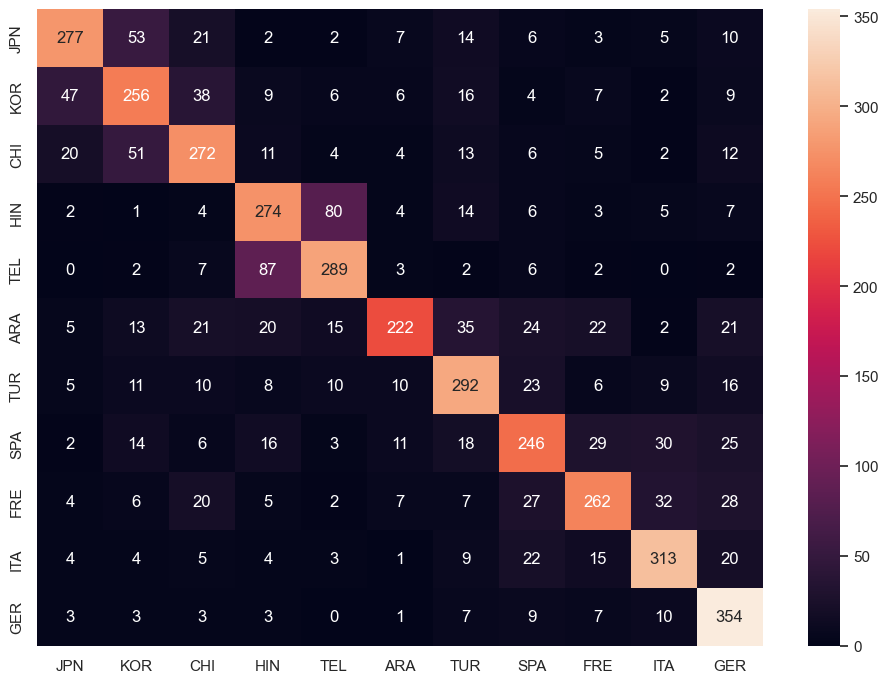

In [40]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(cf_sum, annot=True, fmt='g')

* **after finding best model and groups now we try to extract different features and redo the classification**

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, 
                                                    Y,stratify=Y,
                                                    test_size=0.1111,  shuffle=True)

In [42]:
#would be better if u split data before then fit then transform  
tf = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
tf_Xtrain = tf.fit_transform(X_train)

In [43]:
tf_Xtest = tf.transform(X_test)

In [44]:
tf_Xtest

<1100x654110 sparse matrix of type '<class 'numpy.float64'>'
	with 171414 stored elements in Compressed Sparse Row format>

In [ ]:
#X_test_vect =  pd.DataFrame(data = tf_Xtest.toarray())
#X_train_vect = pd.DataFrame(data = tf_Xtrain.toarray())
#X_test_vect.columns = tf.get_feature_names()
#X_train_vect.columns = tf.get_feature_names()
#X_train_vect.head()

In [45]:
from sklearn.svm import LinearSVC

In [46]:
clf = LinearSVC( max_iter = 2000, verbose= 2)

In [47]:
clf.fit(tf_Xtrain,y_train)

[LibLinear]..*
optimization finished, #iter = 23
Objective value = -830.958683
nSV = 6386
..*
optimization finished, #iter = 27
Objective value = -830.589118
nSV = 5863
..*
optimization finished, #iter = 23
Objective value = -815.639803
nSV = 6224
..*
optimization finished, #iter = 22
Objective value = -744.716155
nSV = 5644
..*
optimization finished, #iter = 24
Objective value = -778.688441
nSV = 5354
..*
optimization finished, #iter = 22
Objective value = -728.783354
nSV = 5344
..*
optimization finished, #iter = 29
Objective value = -782.007675
nSV = 5593
..*
optimization finished, #iter = 27
Objective value = -838.893766
nSV = 5799
..*
optimization finished, #iter = 24
Objective value = -859.534823
nSV = 6264
..*
optimization finished, #iter = 25
Objective value = -720.453358
nSV = 5087
..*
optimization finished, #iter = 24
Objective value = -831.057846
nSV = 6365


LinearSVC(max_iter=2000, verbose=2)

In [48]:
y_pred = clf.predict(tf_Xtest)

In [49]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))


0.7063636363636364


### - Confusion matrix 

In [50]:
labels = le.classes_.tolist()

In [51]:
y_test = le.inverse_transform(y_test)
y_pred = le.inverse_transform(y_pred)

In [52]:
labels = ['JPN', 'KOR', 'CHI',  'HIN',  'TEL', 'ARA',  'TUR', 'SPA',  'FRE', 'ITA' ,'GER']

In [53]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred, labels = labels)

In [54]:
cf_df = pd.DataFrame(cf ,index = labels, columns = labels)

<AxesSubplot:>

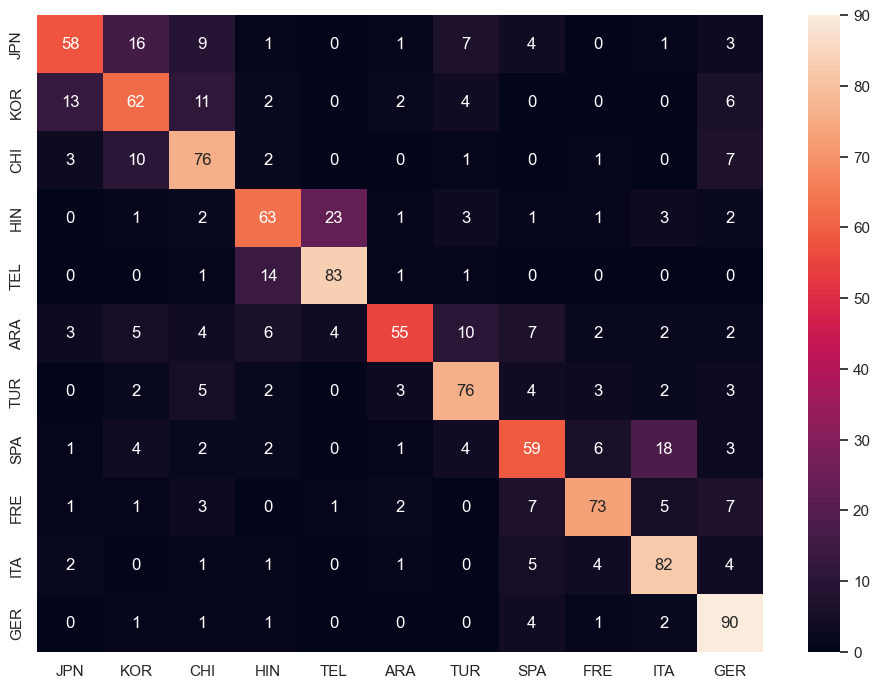

In [55]:
import seaborn as sns
sns.heatmap(cf_df, annot=True)
#basically run on Ytest, we have a 1st table with 100 results 
#re do the thing without losing our 1st table 
#then we have two tables we add them together and in that way we coul have a better undestanding of our matrix

In [56]:
cf_sum = cf_df + cf_df1

<AxesSubplot:>

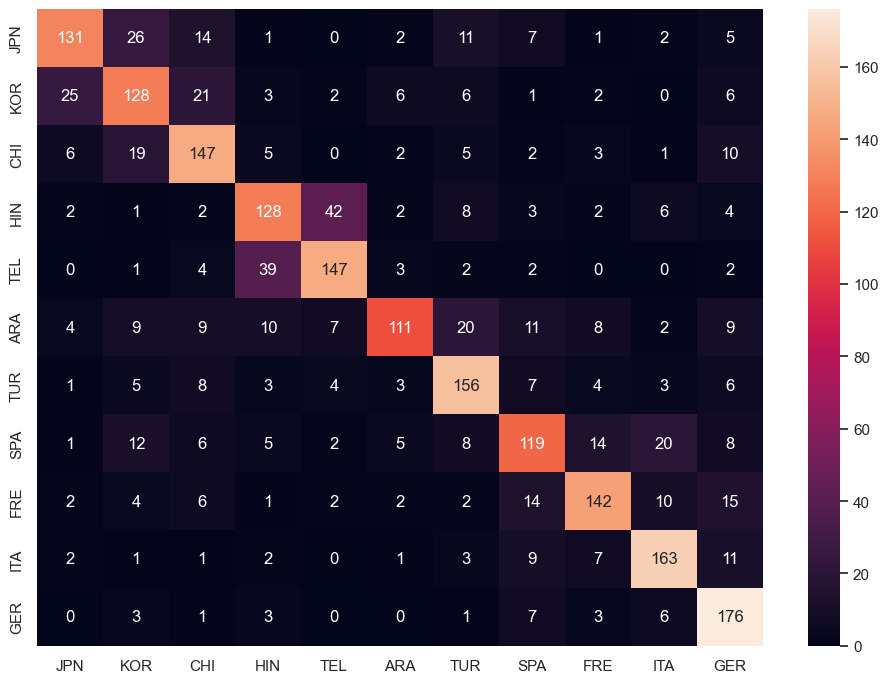

In [57]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(cf_sum, annot=True, fmt='g')

## Classifier Cascades

We find that might be it could be better to separate in to close group of language rather than try to clasify every language at onnce. We can look closer to the confusion matrix of devide it into close relation group of languages.

In [58]:
pd.DataFrame(y_test).value_counts()

ARA    100
CHI    100
FRE    100
GER    100
HIN    100
ITA    100
JPN    100
KOR    100
SPA    100
TEL    100
TUR    100
dtype: int64

In [242]:
asian = ['JPN', 'KOR', 'CHI']
indian = ['HIN', 'TEL']
other = ['ARA', 'TUR', 'GER']
roman = ['SPA', 'FRE', 'ITA']
group = ['ASA', 'IND', 'ROM', 'OTH']
group_without_oth = ['ASA', 'IND', 'ROM']

# le = preprocessing.LabelEncoder()
# df_asian['y_country'] = le.fit_transform(df_asian.country)
# df_indian['y_country'] = le.fit_transform(df_indian.country)
# df_other['y_country'] = le.fit_transform(df_other.country)


In [243]:
def model_cascade(X ,Y, clf, language_group, le_type):
    X_train, X_test, y_train, y_test  = train_test_split(X, 
                                                        Y,stratify=Y,
                                                        test_size=0.1111, shuffle=True)
    
    #would be better if u split data before then fit then transform  
    tf = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
    tf_Xtrain = tf.fit_transform(X_train)
    tf_Xtest = tf.transform(X_test)
    
    
    clf.fit(tf_Xtrain,y_train)
    y_pred = clf.predict(tf_Xtest)
    y_pred_proba = clf.predict_proba(tf_Xtest)
    print("accuracy", accuracy_score(y_test,y_pred))
    
    y_test = le_type.inverse_transform(y_test)
    y_pred = le_type.inverse_transform(y_pred)
    
    labels = language_group
    # print(y_test)
    # print(y_pred)
    print(language_group)
    cf = confusion_matrix(y_test, y_pred, labels = labels)
    # print(y_test)
    cf_df = pd.DataFrame(cf ,index = labels, columns = labels)
    # print(y_test[:10])
    # print(y_pred[:10])
    # print(y_pred_proba[:10])
    # print(clf.classes_)
    # return cf_df
    return cf_df, y_pred_proba, clf

In [244]:
# def model_cascade(X ,Y, clf, language_group, le_type):

    
#     clf.fit(tf_Xtrain,y_train)
#     y_pred = clf.predict(tf_Xtest)
#     y_pred_proba = clf.predict_proba(tf_Xtest)
#     print("accuracy", accuracy_score(y_test,y_pred))
    
#     y_test = le_type.inverse_transform(y_test)
#     y_pred = le_type.inverse_transform(y_pred)
    
#     labels = language_group
#     # print(y_test)
#     # print(y_pred)
#     print(language_group)
#     cf = confusion_matrix(y_test, y_pred, labels = labels)
#     # print(y_test)
#     cf_df = pd.DataFrame(cf ,index = labels, columns = labels)
#     print(y_test[:10])
#     print(y_pred[:10])
#     print(y_pred_proba[:10])
#     print(clf.classes_)
#     # return cf_df
#     return cf_df, y_pred_proba, clf

# #would be better if u split data before then fit then transform  
# tf = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
# tf_Xtrain = tf.fit_transform(X_train)
# tf_Xtest = tf.transform(X_test)
# X_train, X_test, y_train, y_test  = train_test_split(X, 
#                                                     Y,stratify=Y,
#                                                     test_size=0.1111, shuffle=True)

In [245]:
df['language_group'] = df['country'].replace(asian, 'ASA').replace(indian, 'IND').replace(roman, 'ROM').replace(other, 'OTH')
# df['language_group'] = df['country'].replace(indian, 'IND')
# df['language_group'] = df['country'].replace(other, 'OTH')

In [246]:
le_group = preprocessing.LabelEncoder()
df_group = df[~df['language_group'].isin(['OTH'])]
df_group['y_group'] = le_group.fit_transform(df_group.language_group)
# df = df[~df['language'].isin(['OTH'])]

/var/folders/yf/jsht06l94t5_wb6s1c65k6v40000gn/T/ipykernel_84610/348915726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['y_group'] = le_group.fit_transform(df_group.language_group)


In [247]:
df_group

,country,description,y_country,nb_seq,nb_words,len_text,nb_alpha,nb_uppercase,nb_syllable,mean_word_length,mean_sentence_length,mean_sentence_length_byWords,tot_diff_words,cleaned_description,language_group,y_group
2,CHI,Some people believe that young people can enjo...,1,26,362,None,1501,29,532,5.212435,73.730769,15.423077,0.412935,some people believe that young people can enjo...,ASA,0
3,TEL,Travelling is usually considered as good recre...,9,14,344,None,1448,17,1,5.796296,129.571429,25.857143,0.411602,travelling is usually considered as good recre...,IND,1
5,SPA,"In my opinion , travel in group with a tour gu...",8,9,350,None,1336,8,491,5.076923,192.777778,42.000000,0.360526,in my opinion travel in group with a tour guid...,ROM,2
8,HIN,"In the era of science and technology , the peo...",4,18,331,None,1651,27,589,6.552083,113.611111,20.611111,0.490566,in the era of science and technology the peopl...,IND,1
9,JPN,I agree with this statement . I think that in ...,6,19,221,None,905,28,345,4.875969,61.947368,13.421053,0.400000,i agree with this statement i think that in tw...,ASA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,CHI,"Nowadays , more and more people go abroad , no...",1,17,325,None,1339,14,471,5.032432,102.764706,21.882353,0.454301,nowadays more and more people go abroad no mat...,ASA,0
9896,KOR,In accomplishing something that is risky comes...,7,19,339,None,1529,35,545,5.884211,101.263158,19.684211,0.537433,in accomplishing something that is risky comes...,ASA,0
9897,SPA,"At the beginning of the 21st century , the inc...",8,12,327,None,1531,17,558,6.325843,158.333333,29.333333,0.491477,at the beginning of the 21st century the incre...,ROM,2
9898,HIN,The number of cars in use across the world has...,4,20,497,None,2478,22,891,6.364865,152.750000,27.350000,0.453382,the number of cars in use across the world has...,IND,1


In [248]:
X_group = df_group['cleaned_description'].values.tolist() 
Y_group = df_group['y_group'].values.tolist()

In [17]:
from sklearn.calibration import CalibratedClassifierCV

linear_svc = LinearSVC(max_iter=1000)

In [250]:
# Use calibratedclassifier as a model
cf_df_group_2, y_proba_group_2, model_group = model_cascade(X_group,Y_group, CalibratedClassifierCV(linear_svc, cv=5), group_without_oth, le_group)


accuracy 0.91625
['ASA', 'IND', 'ROM']
['IND' 'ASA' 'IND' 'ROM' 'IND' 'ASA' 'ROM' 'ROM' 'ROM' 'IND']
['IND' 'ASA' 'IND' 'ROM' 'IND' 'ASA' 'ROM' 'ROM' 'ROM' 'IND']
[[7.10157246e-03 9.69629257e-01 2.32691703e-02]
 [6.78265759e-01 2.27784878e-01 9.39493631e-02]
 [2.01940770e-03 9.81687619e-01 1.62929732e-02]
 [1.75301413e-02 3.30849341e-02 9.49384925e-01]
 [1.49213158e-02 9.62425550e-01 2.26531343e-02]
 [9.99150176e-01 4.58140475e-04 3.91683606e-04]
 [1.19163460e-03 3.19126206e-01 6.79682160e-01]
 [7.14179242e-02 2.69002132e-01 6.59579944e-01]
 [3.43955298e-03 2.80385522e-01 7.16174925e-01]
 [2.52482049e-03 9.96609646e-01 8.65533063e-04]]
[0 1 2]


In [255]:
X_train, X_test, y_train, y_test  = train_test_split(X_group, 
                                                    Y_group,stratify=Y_group,
                                                    test_size=0.1111, shuffle=True)

#would be better if u split data before then fit then transform  
tf = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
tf_Xtrain = tf.fit_transform(X_train)
tf_Xtest = tf.transform(X_test)

clf = CalibratedClassifierCV(linear_svc, cv=5)
clf.fit(tf_Xtrain,y_train)
y_pred = clf.predict(tf_Xtest)
y_pred_proba = clf.predict_proba(tf_Xtest)
print("accuracy", accuracy_score(y_test,y_pred))

y_test = le_group.inverse_transform(y_test)
y_pred = le_group.inverse_transform(y_pred)

labels = group_without_oth
# print(y_test)
# print(y_pred)
# print(language_group)
cf = confusion_matrix(y_test, y_pred, labels = labels)
# print(y_test)
cf_df_group_2 = pd.DataFrame(cf ,index = labels, columns = labels)

accuracy 0.92375


<AxesSubplot:>

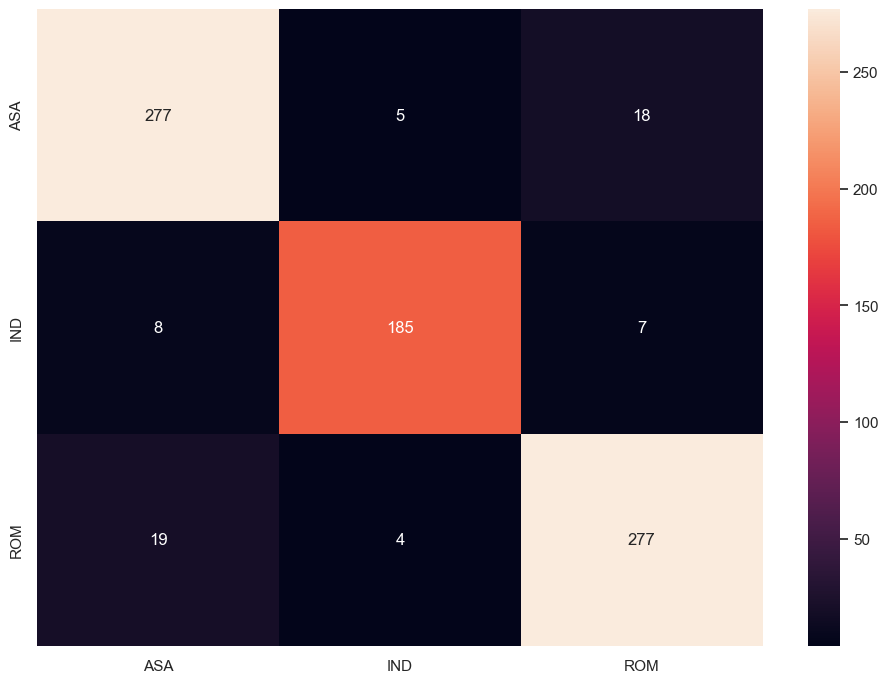

In [256]:
sns.heatmap(cf_df_group_2, annot=True, fmt='g')

In [257]:
# tf = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
tf_Xtest_all = tf.transform(X_test)

In [263]:
full_y_pred_proba = clf.predict_proba(tf_Xtest)

In [189]:
df_asian = df[df['country'].isin(asian)]
df_indian = df[df['country'].isin(indian)]
df_roman = df[df['country'].isin(roman)]
df_other = df[df['country'].isin(other)]


In [120]:
le_asian = preprocessing.LabelEncoder()
df_asian['y_country'] = le_asian.fit_transform(df_asian.country)

/var/folders/yf/jsht06l94t5_wb6s1c65k6v40000gn/T/ipykernel_84610/1807720384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asian['y_country'] = le_asian.fit_transform(df_asian.country)


In [192]:
X_asian = df_asian['cleaned_description'].values.tolist() 
Y_asian = df_asian['y_country'].values.tolist()

In [123]:
from sklearn.svm import SVC

In [134]:
# cf_df_asian = model_cascade(X_asian,Y_asian, LinearSVC(max_iter=1000), asian, le_asian)
cf_df, y = model_cascade(X,Y, CalibratedClassifierCV(linear_svc, cv=5), labels, le)

accuracy 0.6827272727272727
['TUR' 'HIN' 'FRE' ... 'HIN' 'ITA' 'FRE']
['TUR' 'TUR' 'ITA' ... 'HIN' 'ITA' 'FRE']
['JPN', 'KOR', 'CHI', 'HIN', 'TEL', 'ARA', 'TUR', 'SPA', 'FRE', 'ITA', 'GER']
['TUR' 'HIN' 'FRE' ... 'HIN' 'ITA' 'FRE']


<AxesSubplot:>

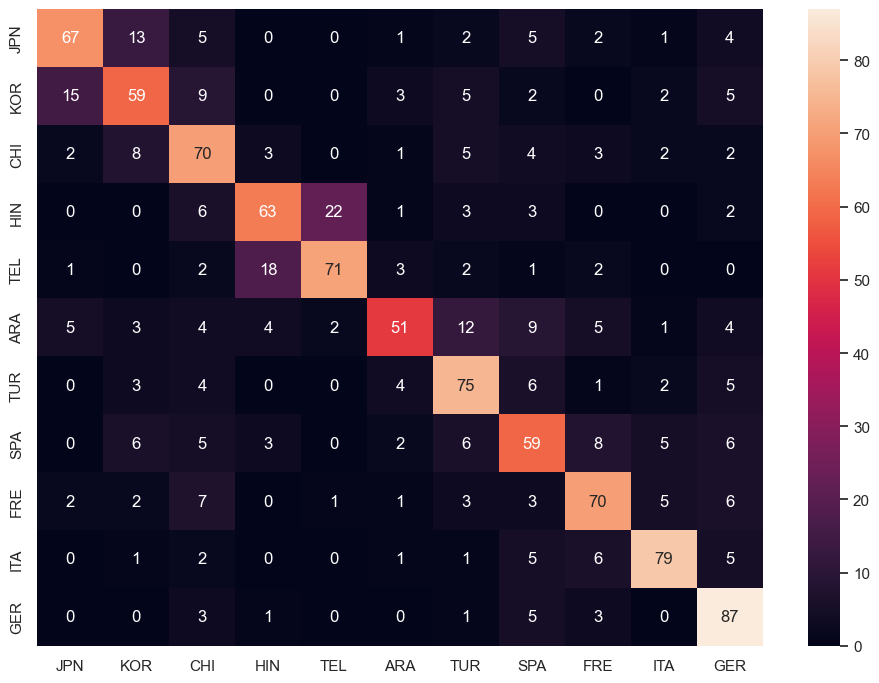

In [135]:
import seaborn as sns
sns.heatmap(cf_df, annot=True)

In [75]:
# Use SVC as the model
cf_df_group, y_proba = model_cascade(X_group,Y_group, SVC(max_iter=1000, probability=True), group)

/Users/laiduy98/miniconda3/envs/nlp/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy 0.8463636363636363
['ASA', 'IND', 'ROM', 'OTH']
['ROM' 'OTH' 'ROM' ... 'IND' 'ASA' 'OTH']


```Note:
i added german to other so other confuse with even roman language
letme try to add german to roman
even it is a german language group
```

In [226]:
tf_Xtest

<1100x119626 sparse matrix of type '<class 'numpy.float64'>'
	with 238422 stored elements in Compressed Sparse Row format>

In [269]:
language_group_distint = []
for language_group_proba in full_y_pred_proba:
    highest_index = [i for i, x in enumerate(language_group_proba) if x > 0.5]
    if highest_index:
        language_group_distint.append(highest_index[0])# Output: 2
    else:
        language_group_distint.append("NaN")

In [270]:
# language_group_distint
print(language_group_distint.count('NaN'))

5


In [271]:
full_y_pred_proba.shape

(800, 3)

In [272]:
language_group_distint

[0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 1,
 0,
 2,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 0,
 2,
 2,
 1,
 0,
 0,
 2,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 'NaN',
 1,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 'NaN',
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 0,
 1,
 2,
 2,
 1,
 'NaN',
 2,
 1,
 0,
 2,
 0,
 2,
 0,
 'NaN',
 0,
 1,
 2,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 0,
 1,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 1,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 2,
 2,
 1,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 1,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 1,


In [99]:
def hierarchical_predict(X, group_clf, classifiers, threshold_group=0.8, threshold_specific=0.5):
    # Predict group probabilities for each instance in X
    group_probabilities = group_clf.predict_proba(X)
    final_predictions = []
    
    # Iterate through each instance's group probabilities
    for i, group_probs in enumerate(group_probabilities):
        # Sort group probabilities in descending order and get the corresponding group indices
        sorted_group_probs = sorted(enumerate(group_probs), key=lambda x: x[1], reverse=True)

        specific_prediction = None
        specific_prob = 0

        # Iterate through sorted group probabilities until a specific label is found or all groups are checked
        for group_idx, group_prob in sorted_group_probs:
            # Check if the group probability is above the threshold_group
            if group_prob >= threshold_group:
                # Get the predicted group label
                group_pred = group_clf.classes_[group_idx]
                # Get the specific classifier for the predicted group
                specific_clf = classifiers[group_pred]

                # Check if the specific classifier supports predict_proba method
                if hasattr(specific_clf, "predict_proba"):
                    # Get specific label probabilities for the current instance
                    specific_probs = specific_clf.predict_proba(X[i])[0]
                    if group_pred == 'other':
                        print(f'specific_probs {specific_probs}')
                    # Find the specific label with the highest probability and its value
                    specific_idx, specific_prob = max(enumerate(specific_probs), key=lambda x: x[1])

                    # Check if the specific probability is above the threshold_specific
                    if specific_prob >= threshold_specific:
                        # Get the specific label and break the loop
                        specific_prediction = specific_clf.classes_[specific_idx]
                        break
                else:
                    # If the specific classifier doesn't support predict_proba, get the prediction directly
                    specific_prediction = specific_clf.predict(X[i])[0]
                    break

        # If no specific prediction was found that meets the thresholds, fall back to the highest probability label
        if specific_prediction is None:
            # Get the group with the highest probability
            group_idx, _ = sorted_group_probs[0]
            group_pred = group_clf.classes_[group_idx]
            # Get the specific classifier for the highest probability group
            specific_clf = classifiers[group_pred]
            # Predict the specific label for the current instance
            specific_prediction = specific_clf.predict(X[i])[0]

        # Append the specific prediction to the final_predictions list
        final_predictions.append(specific_prediction)
        
    return final_predictions

In [105]:
X = df['cleaned_description'].values.tolist() 
Y = df[['country', 'group']]
# Y = zip(df['y_country'].values.tolist(), df['group'].values.)

In [106]:
X_train, X_test, y_train, y_test  = train_test_split(X, 
                                                    Y,stratify=Y,
                                                    test_size=0.1111, shuffle=True)

#would be better if u split data before then fit then transform  
tf = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
tf_Xtrain = tf.fit_transform(X_train)
tf_Xtest = tf.transform(X_test)

In [108]:
def assign_group(label):
    if label in ['JPN', 'KOR', 'CHI']:
        return 'asian'
    elif label in ['HIN', 'TEL']:
        return 'indian'
    elif label in ['ITA', 'FRE', 'SPA']:
        return 'roman'
    else:
        return 'other'

df['group'] = df['country'].apply(assign_group)
# Split the data into training and testing sets, and preprocess the data as you've provided.
# python
# Copy code
# # Your preprocessing code
# Train the group classifier.
# python
# Copy code

X = df['cleaned_description'].values.tolist() 
Y = df[['country', 'group']]

X_train, X_test, y_train, y_test  = train_test_split(X, 
                                                    Y,stratify=Y,
                                                    test_size=0.1111, shuffle=True)

#would be better if u split data before then fit then transform  
tf = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
tf_Xtrain = tf.fit_transform(X_train)
tf_Xtest = tf.transform(X_test)

group_clf = CalibratedClassifierCV(LinearSVC(max_iter=1000, random_state=17))
group_clf.fit(tf_Xtrain, y_train['group'])
# Train specific classifiers for each group.
# python
# Copy code
asian_clf = CalibratedClassifierCV(LinearSVC(max_iter=1000, random_state=17))
indian_clf = CalibratedClassifierCV(LinearSVC(max_iter=1000, random_state=17))
roman_clf = CalibratedClassifierCV(LinearSVC(max_iter=1000, random_state=17))
other_clf = CalibratedClassifierCV(LinearSVC(max_iter=1000, random_state=17))

y_train_reset = y_train.reset_index(drop=True)

asian_indices = y_train_reset[y_train_reset['group'] == 'asian'].index
indian_indices = y_train_reset[y_train_reset['group'] == 'indian'].index
roman_indices = y_train_reset[y_train_reset['group'] == 'roman'].index
other_indices = y_train_reset[y_train_reset['group'] == 'other'].index

asian_clf.fit(tf_Xtrain[asian_indices], y_train_reset.loc[asian_indices, 'country'])
indian_clf.fit(tf_Xtrain[indian_indices], y_train_reset.loc[indian_indices, 'country'])
roman_clf.fit(tf_Xtrain[roman_indices], y_train_reset.loc[roman_indices, 'country'])
other_clf.fit(tf_Xtrain[other_indices], y_train_reset.loc[other_indices, 'country'])

classifiers = {'asian': asian_clf, 'indian': indian_clf, 'roman': roman_clf, 'other': other_clf}
# Make predictions using the hierarchical_predict function.
# python
# Copy code
y_pred = hierarchical_predict(tf_Xtest, group_clf, classifiers)
# Calculate the accuracy of the predictions.
# python
# Copy code
print("accuracy", accuracy_score(y_test['country'], y_pred))
# With this setup, you'll train a group classifier and specific classifiers for each group using LinearSVC, and then use the hierarchical_predict function to make predictions on the test data.

specific_probs [0.03503302 0.0056099  0.95935708]
specific_probs [0.06994593 0.87799255 0.05206152]
specific_probs [0.0027484  0.88231732 0.11493428]
specific_probs [1.06176137e-01 2.29299049e-04 8.93594564e-01]
specific_probs [9.77307557e-01 2.55691199e-04 2.24367519e-02]
specific_probs [8.91788407e-01 2.45504893e-04 1.07966089e-01]
specific_probs [0.00147512 0.02649831 0.97202658]
specific_probs [0.5670997  0.00955237 0.42334793]
specific_probs [0.01096113 0.98408715 0.00495172]
specific_probs [9.99249927e-01 4.98522162e-04 2.51551313e-04]
specific_probs [0.81706575 0.00227083 0.18066343]
specific_probs [0.00389165 0.0363308  0.95977754]
specific_probs [0.00910495 0.36403395 0.6268611 ]
specific_probs [0.27377829 0.01707567 0.70914604]
specific_probs [0.9856816  0.01085932 0.00345908]
specific_probs [0.02208225 0.63482172 0.34309603]
specific_probs [0.44362958 0.11405771 0.44231271]
specific_probs [0.004958   0.09646951 0.89857248]
specific_probs [0.19305126 0.01156116 0.79538757]
sp

In [57]:

labels = ['JPN', 'KOR', 'CHI',  'HIN',  'TEL', 'ARA',  'TUR', 'SPA',  'FRE', 'ITA' ,'GER']
cf = confusion_matrix(y_test['country'], y_pred, labels=labels)

<AxesSubplot:>

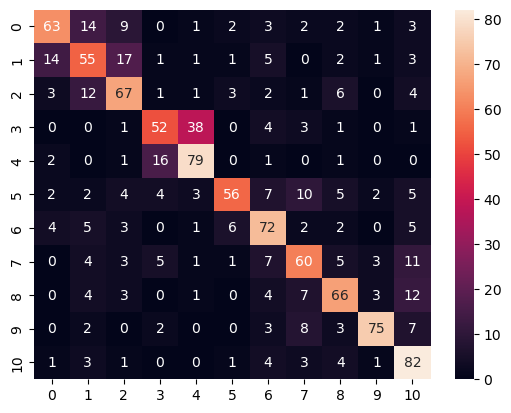

In [58]:
import seaborn as sns

sns.heatmap(cf, annot=True)

In [111]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Number of folds for cross-validation
n_folds = 5

# Initialize the cross-validator
cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=17)

# Prepare input and target features
X = df['cleaned_description'].values.tolist() 
Y = df[['country', 'group']]

# Transform the text data using TfidfVectorizer
tf = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
tf_X = tf.fit_transform(X)

# Initialize the group classifier
group_clf = CalibratedClassifierCV(LinearSVC(max_iter=10000))

# Initialize the specific classifiers
asian_clf = CalibratedClassifierCV(LinearSVC(max_iter=10000))
indian_clf = CalibratedClassifierCV(LinearSVC(max_iter=10000))
roman_clf = CalibratedClassifierCV(LinearSVC(max_iter=10000))
other_clf = CalibratedClassifierCV(LinearSVC(max_iter=10000))
classifiers = {'asian': asian_clf, 'indian': indian_clf, 'roman': roman_clf, 'other': other_clf}

# Initialize a list to store the accuracy scores
accuracy_scores = []

# Perform cross-validation
for train_index, test_index in cv.split(tf_X, Y['group']):
    # Split the data into training and testing sets
    X_train, X_test = tf_X[train_index], tf_X[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Train the group classifier
    group_clf.fit(X_train, y_train['group'])

    # Train specific classifiers for each group
    asian_indices = y_train[y_train['group'] == 'asian'].index
    indian_indices = y_train[y_train['group'] == 'indian'].index
    roman_indices = y_train[y_train['group'] == 'roman'].index
    other_indices = y_train[y_train['group'] == 'other'].index

    # Find the corresponding indices in the train_index array
    asian_train_indices = np.where(np.isin(train_index, asian_indices))[0]
    indian_train_indices = np.where(np.isin(train_index, indian_indices))[0]
    roman_train_indices = np.where(np.isin(train_index, roman_indices))[0]
    other_train_indices = np.where(np.isin(train_index, other_indices))[0]

    # Train specific classifiers using the updated indices
    asian_clf.fit(X_train[asian_train_indices], y_train.loc[asian_indices, 'country'])
    indian_clf.fit(X_train[indian_train_indices], y_train.loc[indian_indices, 'country'])
    roman_clf.fit(X_train[roman_train_indices], y_train.loc[roman_indices, 'country'])
    other_clf.fit(X_train[other_train_indices], y_train.loc[other_indices, 'country'])

    # Make predictions using the hierarchical_predict function
    y_pred = hierarchical_predict(X_test, group_clf, classifiers)
    print(y_pred)
    # y_pred = le.inverse_transform(y_pred)

    # Calculate the accuracy of the predictions and append it to the accuracy_scores list
    accuracy_scores.append(accuracy_score(y_test['country'], y_pred))
    # y_pred = le.inverse_transform(y_pred)
    # y_test['country'] = le.inverse_transform(y_test['country'])

# Calculate the average accuracy score
average_accuracy = sum(accuracy_scores) / n_folds
print(f"Average accuracy: {average_accuracy}")

specific_probs [0.37628986 0.31614883 0.30756131]
specific_probs [0.04717505 0.74921283 0.20361212]
specific_probs [0.03357858 0.08879964 0.87762178]
specific_probs [0.07396583 0.77904059 0.14699358]
specific_probs [0.18842777 0.00841373 0.80315851]
specific_probs [0.57381476 0.35433349 0.07185175]
specific_probs [9.17305590e-01 9.38111140e-05 8.26005991e-02]
specific_probs [0.00705078 0.89358371 0.09936551]
specific_probs [6.71663639e-01 1.02232368e-04 3.28234128e-01]
specific_probs [0.16993277 0.01036288 0.81970434]
specific_probs [0.13086772 0.00789196 0.86124032]
specific_probs [0.0446564  0.44112673 0.51421687]
specific_probs [0.04024859 0.35597126 0.60378014]
specific_probs [0.72749041 0.00072778 0.27178181]
specific_probs [0.0189476  0.00427492 0.97677748]
specific_probs [0.0332512  0.34268237 0.62406643]
specific_probs [0.20769148 0.04690291 0.74540561]
specific_probs [0.05171822 0.02411445 0.92416733]
specific_probs [0.01429397 0.02304757 0.96265846]
specific_probs [0.34303141

<AxesSubplot:>

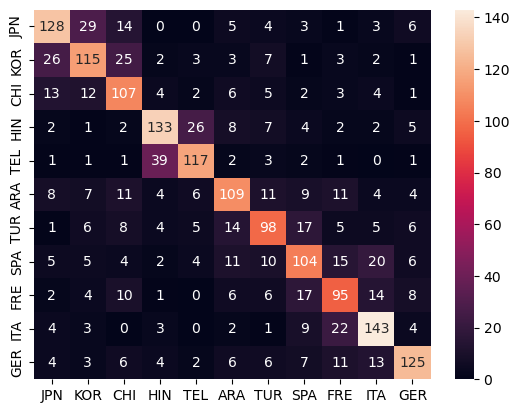

In [112]:

labels = ['JPN', 'KOR', 'CHI',  'HIN',  'TEL', 'ARA',  'TUR', 'SPA',  'FRE', 'ITA' ,'GER']
cf = confusion_matrix(y_test['country'], y_pred, labels=labels)
cf = pd.DataFrame(cf ,index = labels, columns = labels)
import seaborn as sns

sns.heatmap(cf, annot=True, fmt='g')

In [77]:
labels

['JPN', 'KOR', 'CHI', 'HIN', 'TEL', 'ARA', 'TUR', 'SPA', 'FRE', 'ITA', 'GER']